In [198]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import datetime
import matplotlib.pyplot as plt
from collections import defaultdict

In [199]:
def weekDay(dataframe) -> str:
    weeks = []
    memo={1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
    for i in dataframe:
        day,month,year = [int(j) for j in i.split('-')]
        week = datetime.datetime(year,month,day).isoweekday()
        weeks.append(week)
    return weeks



In [200]:
df = pd.read_csv('data.csv')
df['week'] = pd.DataFrame(weekDay(df['Date']))
df['msg'] = df['msg'].str.replace('*','')
df.drop(columns=['Unnamed: 5', 'Unnamed: 6','Unnamed: 7'],inplace=True)
df = df[~(df['msg'].str.contains('http'))]

df

,Date,time,hour,who,msg,week
0,01-02-2024,10,50 am,+91 99871 01492,Dear students,4
1,01-02-2024,11,38 am,+91 98216 23072,Dear All,4
2,01-02-2024,2,34 pm,+91 95032 25023,🌟Greetings from WIE KJSIT !🌟,4
3,01-03-2024,10,10 am,+91 91369 12677,This message was deleted,5
4,01-03-2024,10,11 am,+91 91369 12677,Prisha Gogri,5
...,...,...,...,...,...,...
530,31-01-2024,11,30 am,+91 98204 67690,Others submit Adhar card copy to Sandhya mam ...,3
531,31-01-2024,4,50 pm,+91 75079 92998,Dear Faculties and Students,3
532,31-01-2024,9,43 pm,+91 92091 71513,Hey everyone! 🤗,3
534,31-03-2024,11,20 am,+91 99871 01492,👆🏻 please do listen this,7


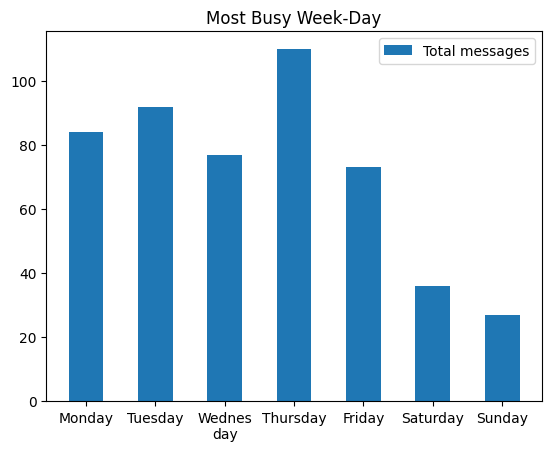

In [201]:
most_busy_day = df.groupby(by=['week'],as_index=False)['msg'].count().rename(columns={'msg':'Total Messages'}).sort_values('week').replace([i for i in range(1,8)],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

fig,ax=plt.subplots()

ax.bar(['Monday','Tuesday','Wednes\nday','Thursday','Friday','Saturday','Sunday'],most_busy_day['Total Messages'],width=0.5,label='Total messages')
ax.set_title('Most Busy Week-Day')
ax.legend()

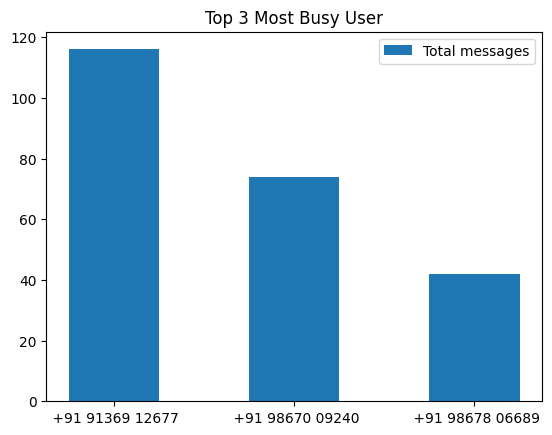

In [202]:
most_msg = df.groupby(by=['who'],as_index=False)['msg'].count().rename(columns={'msg':'Total Messages'}).sort_values('Total Messages',ascending=False).head(3)

fig,ax=plt.subplots()

ax.bar(most_msg['who'],most_msg['Total Messages'],width=0.5,label='Total messages')
ax.set_title('Top 3 Most Busy User')
ax.legend()


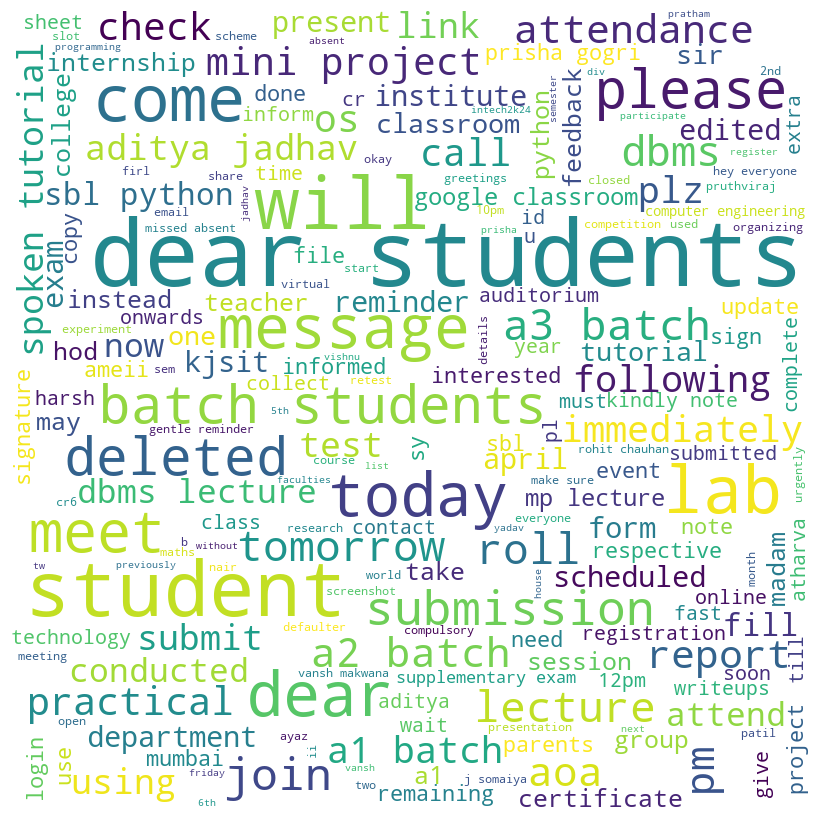

In [203]:
comment_words = ''
stopwords = set(STOPWORDS)
memo = defaultdict(int)

for val in df['msg']:
    
    tokens = str(val).split()
     
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        memo[tokens[i]] += 1
        
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

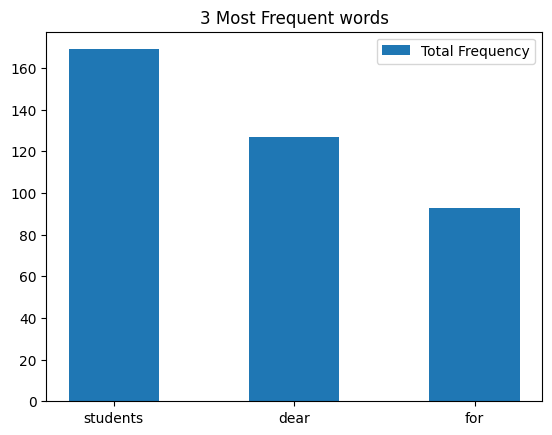

In [204]:
most_freq = {i:memo[i] for i in sorted(memo,key=lambda x:memo[x],reverse=True)[:3]}

fig,ax=plt.subplots()

ax.bar(most_freq.keys(),most_freq.values(),width=0.5,label='Total Frequency')
ax.set_title('3 Most Frequent words')
ax.legend()